
<meta name="viewport" content="width=device-width, initial-scale=1">
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet">
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.2/css/all.min.css">
<link rel="stylesheet" href="../static/css/styles.css">


        
<!-- <body> -->
<!-- Navigation-->
<nav class="navbar navbar-expand-lg navbar-light fixed-top" id="mainNav">
    <div class="container px-4 px-lg-5">
        <a class="navbar-brand" href="../index.html">Home</a>
        <button class="navbar-toggler" type="button" data-bs-toggle="collapse" data-bs-target="#navbarResponsive" aria-controls="navbarResponsive" aria-expanded="false" aria-label="Toggle navigation">
            Menu
            <i class="fas fa-bars"></i>
        </button>
        <div class="collapse navbar-collapse" id="navbarResponsive">
            <ul class="navbar-nav ms-auto py-4 py-lg-0">
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="../index.html">Executive Summary</a></li>
                <!-- <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="eda.html">Exploratory Data Analysis</a></li> -->
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="models.html">Model Construction & Validation</a></li>
                <li class="nav-item"><a class="nav-link px-lg-3 py-3 py-lg-4" href="initial_work.html">Reference: Model Development</a></li>
            </ul>
        </div>
    </div>
</nav>




<h2 id="title" style="text-align: center; width: 80%;">Exploratory Data Analysis</h2>

# Table of Contents

- [Description and Deliverables](#description-and-deliverables)
- [Data Dictionary](#data-dictionary)
- [Descriptive Statistics](#descriptive-statistics)
  - [Outliers](#outliers)
- [Exploratory Data Analysis](#eda)
  - [Summary Visualizations](#summary-visualizations)
  - [Satisfaction Levels](#scatter-plots)
  - [Tenure](#tenure)
  - [Number of Projects](#number-of-projects)
  - [Salary & Promotions](#salary)
  - [Work Accident](#work-accident)
  - [Department](#department)
  - [Correlation Matrix](#correlation-matrix)
- [Insights](#insights)

<a id="description-and-deliverables"></a>

# Description and Deliverables
---

[Back to top](#)

The hypothetical HR department at the fictional Salifort Motors collected employee data to improve satisfaction. They requested data-driven suggestions based on an analysis of this data. The main question is: what factors are likely to make an employee leave the company?

The **goal** of this project is to **analyze the data** and build a model to **predict employee attrition**. By identifying which employees are likely to leave, it may be possible to determine the factors contributing to their departure. The model should be interpretable so HR can design targeted interventions to improve retention. Improving retention can reduce the costs associated with hiring and training new employees.

**Stakeholders:**  
The primary stakeholder is the Human Resources (HR) department, as they will use the results to inform retention strategies. Secondary stakeholders include C-suite executives who oversee company direction, managers implementing day-to-day retention efforts, employees (whose experiences and outcomes are directly affected), and, indirectly, customers—since employee satisfaction can impact customer satisfaction.

**Ethical Considerations:**  
- Ensure employee data privacy and confidentiality throughout the analysis.
- Avoid introducing or perpetuating bias in model predictions (e.g., not unfairly targeting specific groups).
- Maintain transparency in how predictions are generated and how they will be used in HR decision-making.

### This page summarizes the first part of the project: exploratory data analysis.

<a id="data-dictionary"></a>

# Data Dictionary
---

[Back to top](#)

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image, display

<a id="descriptive-statistics"></a>

# Descriptive Statistics
---

[Back to top](#)

**Initial Data Observations:**  
- The workforce displays moderate satisfaction and generally high performance reviews.
- Typical tenure is 3–4 years, with most employees (98%) not promoted recently.
- Workplace accidents are relatively rare (14%).
- Most employees are in lower salary bands and concentrated in sales, technical, and support roles.
- About 24% of employees have left the company.
- No extreme outliers, though a few employees have unusually long tenures or high monthly hours.


> Note: During initial data exploration, several basic data cleaning steps were taken. Columns were renamed to standardized snake_case format for consistency and easier coding. I confirmed there were no missing values, reducing the risk of bias or errors. Outliers were explored but not removed at this stage; they will be addressed as needed during modeling.
>
> Most importantly, there were 3,008 duplicate rows in the dataset. Since it is highly improbable for two employees to have identical responses across all columns, these **duplicate entries were removed** from the analysis.

Display the first few rows of data:

In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("../resources/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

And the descriptive statistics:

In [3]:
# Gather descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Department value counts and percent:

In [4]:
# Department value counts and percent
dept_counts = df0.Department.value_counts()
dept_percent = df0.Department.value_counts(normalize=True) * 100
dept_summary = pd.DataFrame({"Count": dept_counts, "Percent": dept_percent.round(2)})
dept_summary

Count  Percent
Department                 
sales         4140    27.60
technical     2720    18.13
support       2229    14.86
IT            1227     8.18
product_mng    902     6.01
marketing      858     5.72
RandD          787     5.25
accounting     767     5.11
hr             739     4.93
management     630     4.20

Salary value counts and percent:

In [5]:
# Salary value counts and percent
salary_counts = df0.salary.value_counts()
salary_percent = df0.salary.value_counts(normalize=True) * 100
salary_summary = pd.DataFrame(
    {"Count": salary_counts, "Percent": salary_percent.round(2)}
)
salary_summary

Count  Percent
salary                
low      7316    48.78
medium   6446    42.98
high     1237     8.25

#### **Observations from descriptive statistics**

- **satisfaction_level:** Employee job satisfaction scores range from 0.09 to 1.0, with an average of about 0.61. The distribution is fairly wide (std ≈ 0.25), suggesting a mix of satisfied and dissatisfied employees.
- **last_evaluation:** Performance review scores are generally high (mean ≈ 0.72), ranging from 0.36 to 1.0, with most employees scoring above 0.56.
- **number_project:** Employees typically work on 2 to 7 projects, with a median of 4 projects.
- **average_monthly_hours:** The average employee works about 201 hours per month, with a range from 96 to 310 hours, indicating some employees work significantly more than others.
- **time_spend_company:** Most employees have been with the company for 2 to 10 years, with a median of 3 years. There are a few long-tenure employees (up to 10 years), but most are around 3–4 years.
- **Work_accident:** About 14% of employees have experienced a workplace accident.
- **left:** About 24% of employees have left the company (mean ≈ 0.24), so roughly one in four employees in the dataset is a leaver.
- **promotion_last_5years:** Very few employees (about 2%) have been promoted in the last five years.
- **department:** The largest departments are sales, technical, and support, which together account for over half of the workforce. Other departments are notably smaller.
- **salary:** Most employees are in the low (49%) or medium (43%) salary bands, with only a small proportion (8%) in the high salary band.

**Summary:**  
The data shows a workforce with moderate satisfaction, generally high performance reviews, and a typical tenure of 3–4 years. Most employees have not been promoted recently, and workplace accidents are relatively uncommon. Most employees are in lower salary bands and concentrated in sales, technical, and support roles. There is a notable proportion of employees who have left. There are no extreme outliers, but a few employees have unusually long tenures or high monthly hours.

In [6]:
# Rename columns as needed
df0.rename(
    columns={
        "Department": "department",
        "Work_accident": "work_accident",
        "average_montly_hours": "average_monthly_hours",
        "time_spend_company": "tenure",
    },
    inplace=True,
)


# Display all column names after the update
# df0.columns

In [7]:
# Check for missing values
# df0.isna().sum()

In [8]:
# Check for duplicates
# df0.duplicated().sum()

In [9]:
# Inspect some rows containing duplicates as needed
# df0[df0.duplicated()].head()

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
# print(df.info())
# df.head()

<a id="outliers"></a>

## &#8227; Outliers

[Back to top](#)

Note that long-term employees—those at the company for over five years—are outliers in the data.

> Note that employees with unusually high average monthly hours or an exceptionally high or low number of projects may also be considered outliers. These cases are not obvious in overall summary statistics or aggregate plots, as their effect is diluted by the much larger group of typical employees. Aggregate statistics alone can mask important subgroup dynamics. These subgroups will become apparent.

In [11]:
# Boxplot of `average_monthly_hours` to visualize distribution and detect outliers
# plt.figure(figsize=(6, 2))
# sns.boxplot(x=df["average_monthly_hours"])
# plt.title("Boxplot of Average Monthly Hours")
# plt.xlabel("Average Monthly Hours")
# plt.show()

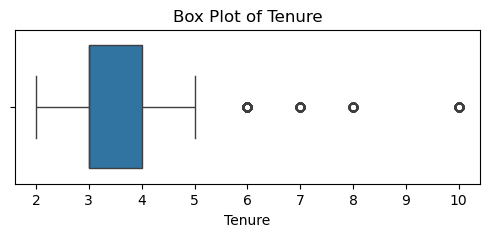

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["tenure"])
plt.title("Box Plot of Tenure")
plt.xlabel("Tenure")
plt.show()

In [13]:
# Determine the number of rows containing outliers
q1 = df.tenure.quantile(0.25)
q3 = df.tenure.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# Filter the dataframe to find outliers
outliers = df[df.tenure > upper_bound]

# Display the number of outliers
# print(f"Number of tenure outliers: {len(outliers)}")
# print(f"Outliers percentage of total: {len(outliers) / len(df) * 100:.2f}%")

Number of tenure outliers: 824

Outliers percentage of total: 6.87%

> Some models are more sensitive to outliers than others. For the logistic regression model, tenure outliers will be removed.

<a id="eda"></a>

# Exploratory Data Analysis
---

[Back to top](#)


First, look at the distribution of employees who left versus those who stayed.

In [14]:
# Get numbers of people who left vs. stayed
# Get percentages of people who left vs. stayed
left_counts = df.left.value_counts()
left_percent = df.left.value_counts(normalize=True) * 100

left_summary = pd.DataFrame({"Count": left_counts, "Percent": left_percent.round(2)})

left_summary.index = left_summary.index.map({0: "Stayed", 1: "Left"})
left_summary.index.name = None # reset index name for clarity
left_summary

Count  Percent
Stayed  10000     83.4
Left     1991     16.6

### Summary of EDA

<div class="emphasis-box">

Two major groups of employees left the company:<br>
- <b>Overworked and Miserable:</b> These employees had low satisfaction but were assigned a high number of projects (6–7) and worked 250–300 hours per month. Notably, 100% of employees with 7 projects left.  <br>
- <b>Underworked and Dissatisfied:</b> These employees had low satisfaction and worked fewer hours and projects. They may have been fired. Alternately, they may have given notice or had already mentally checked out and were assigned less work.
</div>


<p class="center-icons">
  <i class="fa fa-circle circle-green"></i>
  <i class="fa fa-circle circle-green"></i>
  <i class="fa fa-circle circle-green"></i>
</p>

Employees working on 3–4 projects generally stayed. Most groups worked more than a typical 40-hour workweek. 

Attrition is highest at the 4–5 year mark, with a sharp drop-off in departures after 5 years. This suggests a critical window for retention efforts. Employees who make it past 5 years are much more likely to stay.

Both leavers and stayers tend to have similar evaluation scores, though some employees with high evaluations still leave—often those who are overworked. This suggests that strong performance alone does not guarantee retention if other factors (like satisfaction or workload) are problematic.
 
**Relationships Between Variables:**
- **Satisfaction level** is the strongest predictor of attrition. Employees who left had much lower satisfaction than those who stayed.
- **Number of projects** and **average monthly hours** show a non-linear relationship: both underworked and overworked employees are more likely to leave, while those with a moderate workload tend to stay.
- **Employee evaluation** (last performance review) has a weaker relationship with attrition compared to satisfaction or workload. 
- **Tenure** shows a moderate relationship with attrition: employees are most likely to leave at the 4–5 year mark, with departures dropping sharply after 5 years.
- **Promotion in the last 5 years** is rare, and lack of promotion is associated with higher attrition.
- **Department** and **salary** have only minor effects on attrition compared to satisfaction and workload.
- **Work accidents** are slightly associated with lower attrition, possibly due to increased support after an incident.
 
**Distributions in the Data:**
- Most variables (satisfaction, evaluation, monthly hours) are broadly distributed, with some skewness.
- **Tenure** is concentrated around 3–4 years, with few employees beyond 5 years.
- **Number of projects** is typically 3–4, but a small group has 6–7 projects (most of whom left).
- **Salary** is heavily skewed toward low and medium bands.
- There are no extreme outliers, but a few employees have unusually high tenure or monthly hours.
 
**Ethical Considerations:**
- Ensure employee data privacy and confidentiality.
- Avoid introducing or perpetuating bias in analysis or modeling.
- Be transparent about how findings and predictions will be used.
- Consider the impact of recommendations on employee well-being and fairness.
 
**Note:**  
This data is clearly synthetic—it's too clean, and the clusters in the charts are much neater than what you’d see in real-world HR data.  
>

<a id="summary-visualizations"></a>

## &#8227; Summary Visualizations

[Back to top](#)


### Visualizing Feature Distributions and Relationships by Employee Attrition

These are overview plots that provide a broad look at the data. After these, we’ll focus on individual features in more detail. The goal here is to give an initial sense of the dataset’s structure and key patterns.

**Pairplots** show the relationships between features, with the diagonal displaying each feature’s distribution.


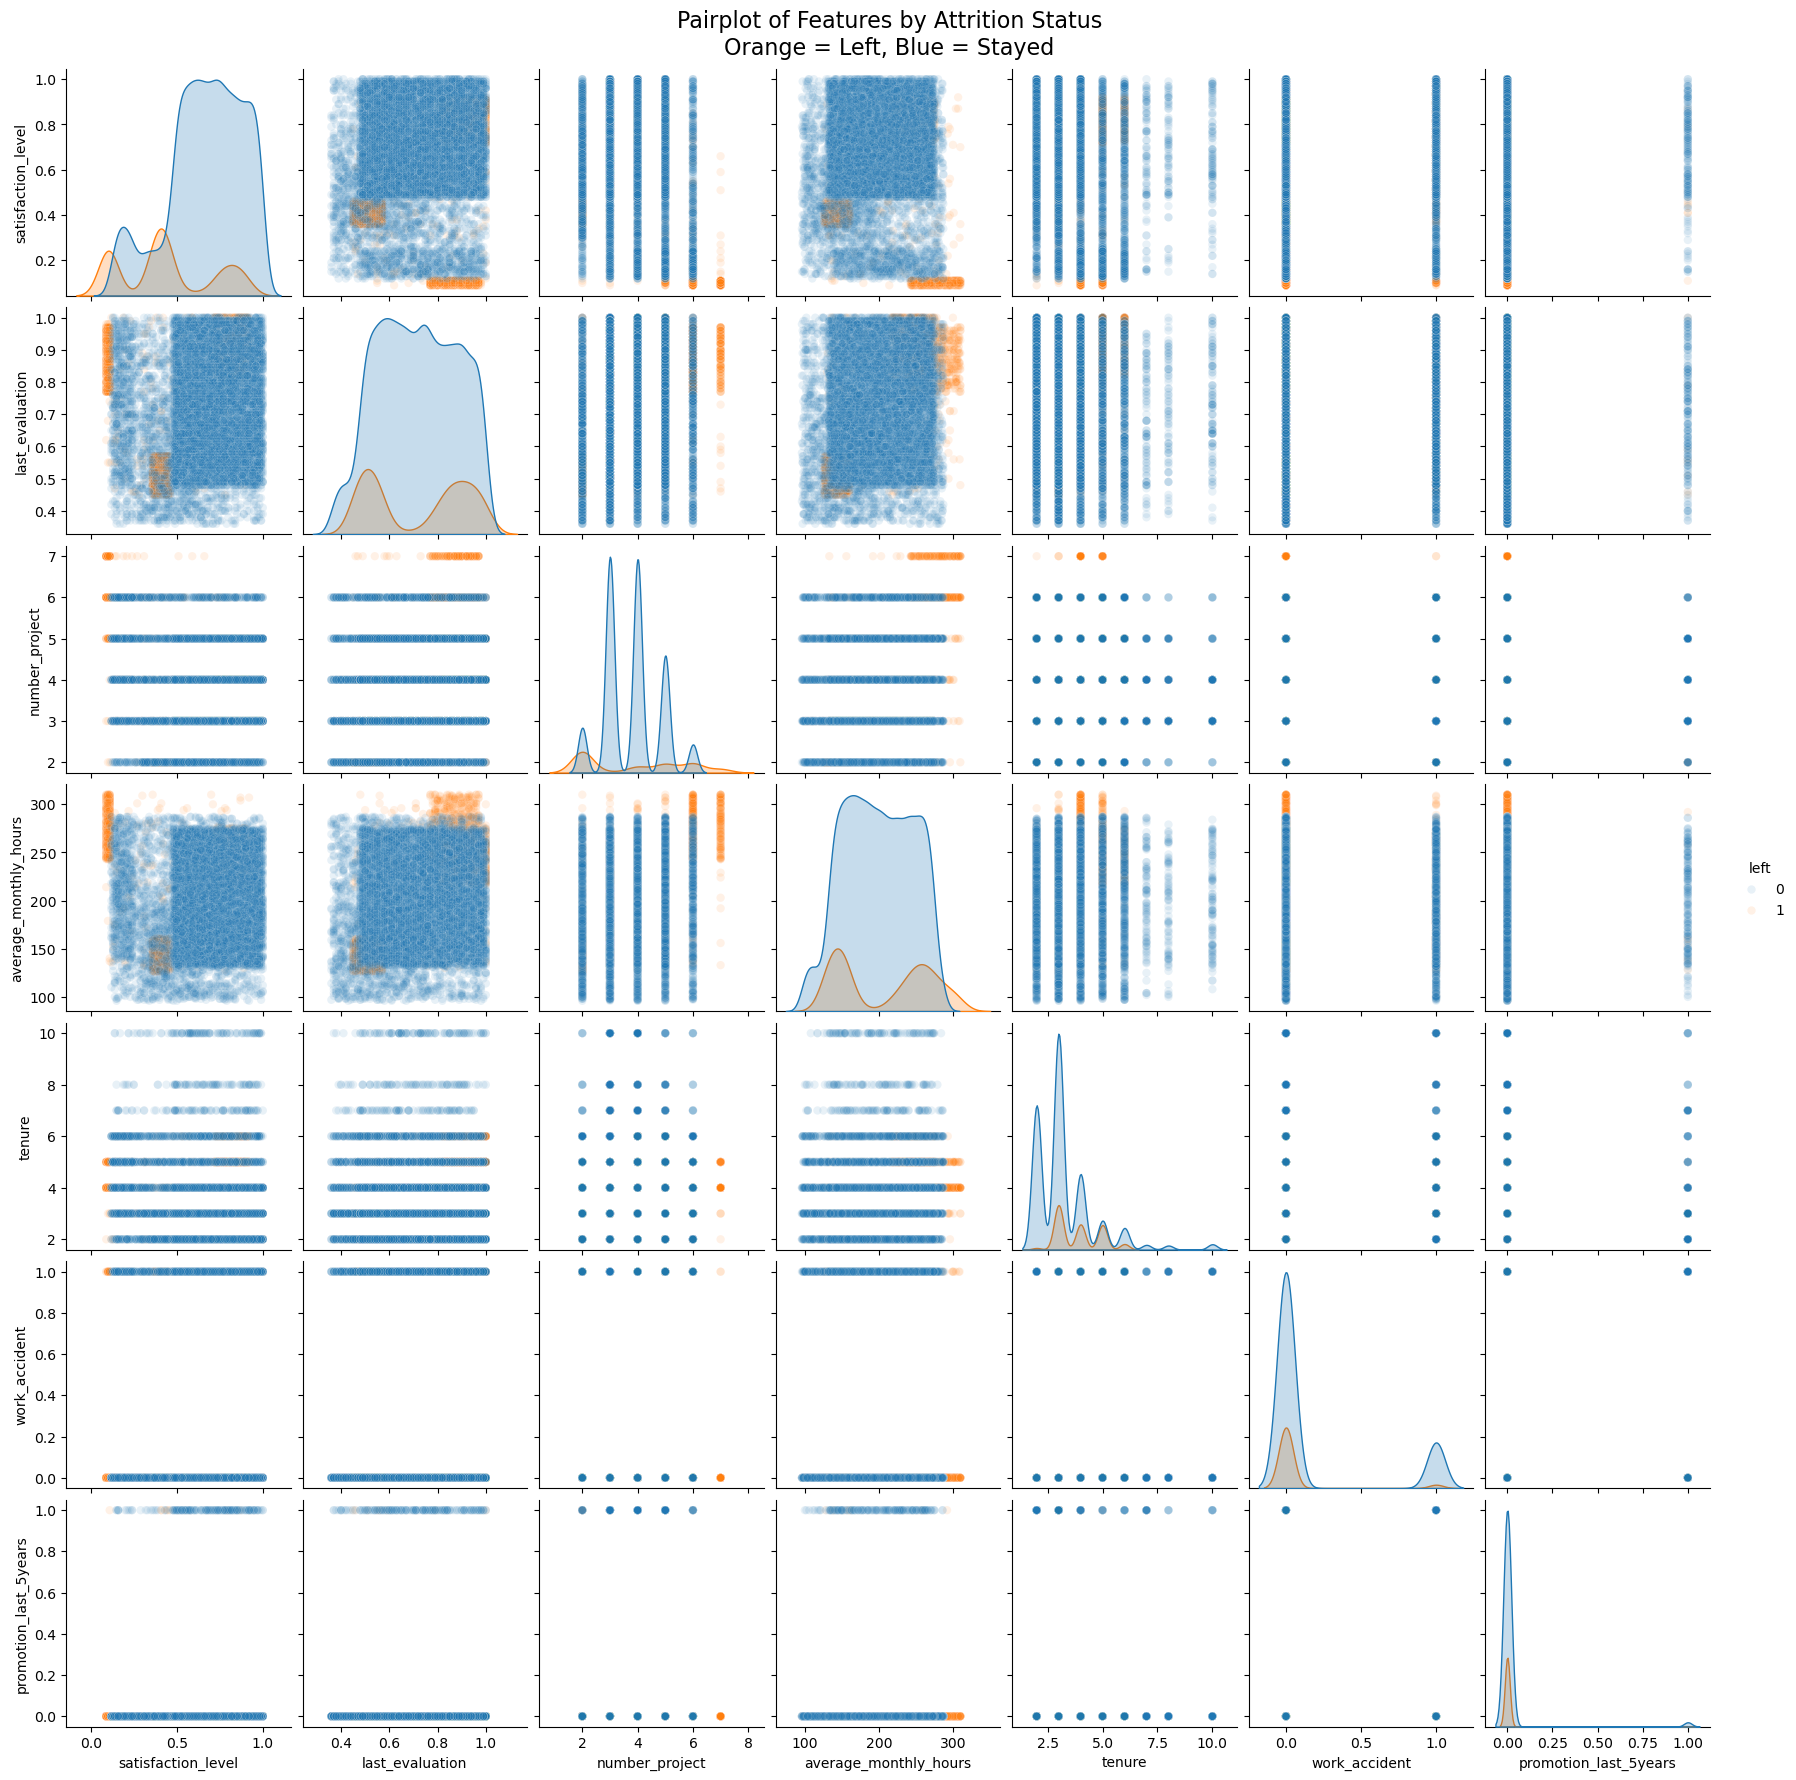

In [15]:
# Pairplot to visualize relationships between features
g = sns.pairplot(df, hue="left", diag_kind="kde", plot_kws={"alpha": 0.1})
g.fig.suptitle(
    "Pairplot of Features by Attrition Status\nOrange = Left, Blue = Stayed",
    y=1.02, fontsize=16
)
plt.show()

**Boxplots** summarize the overall distribution of each feature. However, as noted earlier, aggregate plots can sometimes hide important subgroups or outliers.

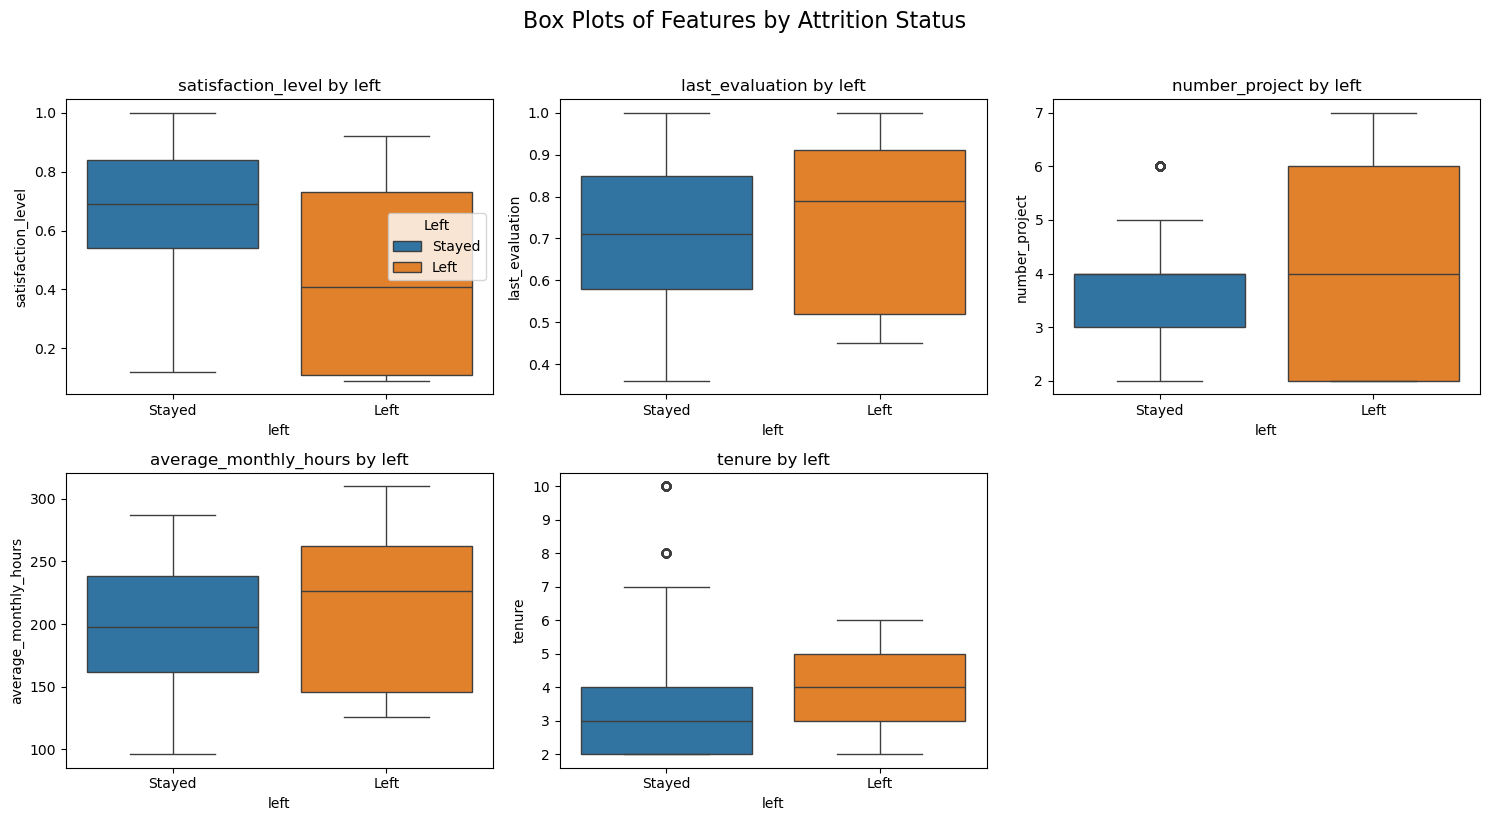

In [16]:
# Boxplots to visualize distributions of numerical features by `left`
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(x="left", y=col, data=df, hue="left")
    plt.title(f"{col} by left")
    ax.set_xticklabels(["Stayed", "Left"])
    if i == 1:  # only add legend to the first subplot to avoid duplicates
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles, ["Stayed", "Left"], title="Left")
    else:
        ax.get_legend().remove()
plt.suptitle("Box Plots of Features by Attrition Status", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

**Violin plots** are especially useful here, as they reveal the presence of distinct subgroups. For example, in `satisfaction_level`, you can see the extremely miserable and somewhat dissatisfied employees, along with those who left for more typical reasons. In `last_evaluation` and `average_monthly_hours`, employees who left cluster at both extremes, while those who stayed are more evenly distributed. For `number_project`, leavers are concentrated at both the low and high ends, and for `tenure`, there is a noticeable spike in departures around the 4–5 year mark.

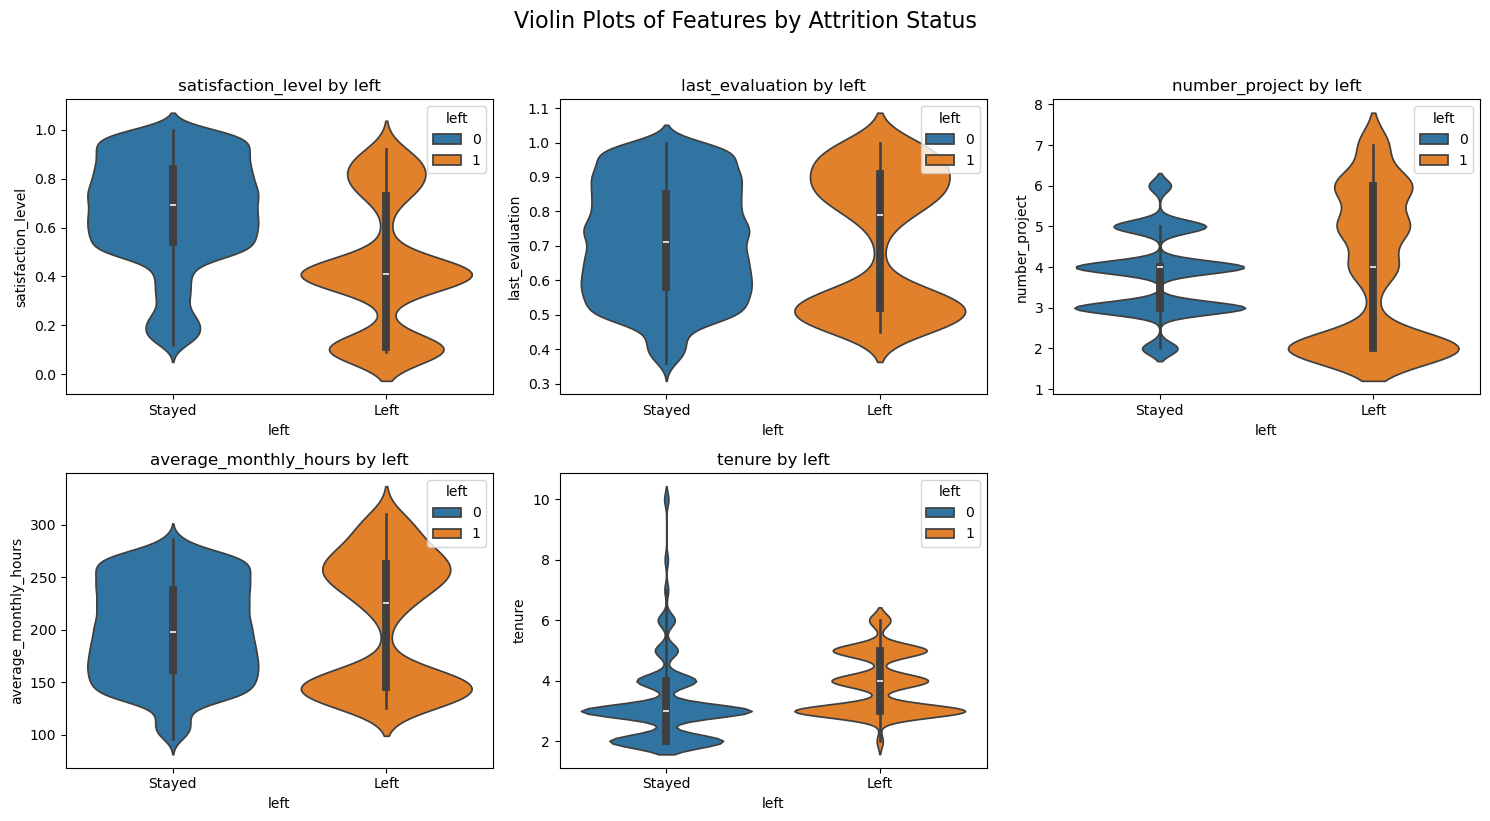

In [17]:
# Violin plots to visualize distributions of numerical features by `left`
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    ax = sns.violinplot(x="left", y=col, data=df, inner="box", hue="left")
    plt.title(f"{col} by left")
    ax.set_xticklabels(["Stayed", "Left"])
plt.suptitle("Violin Plots of Features by Attrition Status", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Finally, we include **histograms** for each feature—first normalized (to compare proportions between leavers and stayers), and then as raw counts.

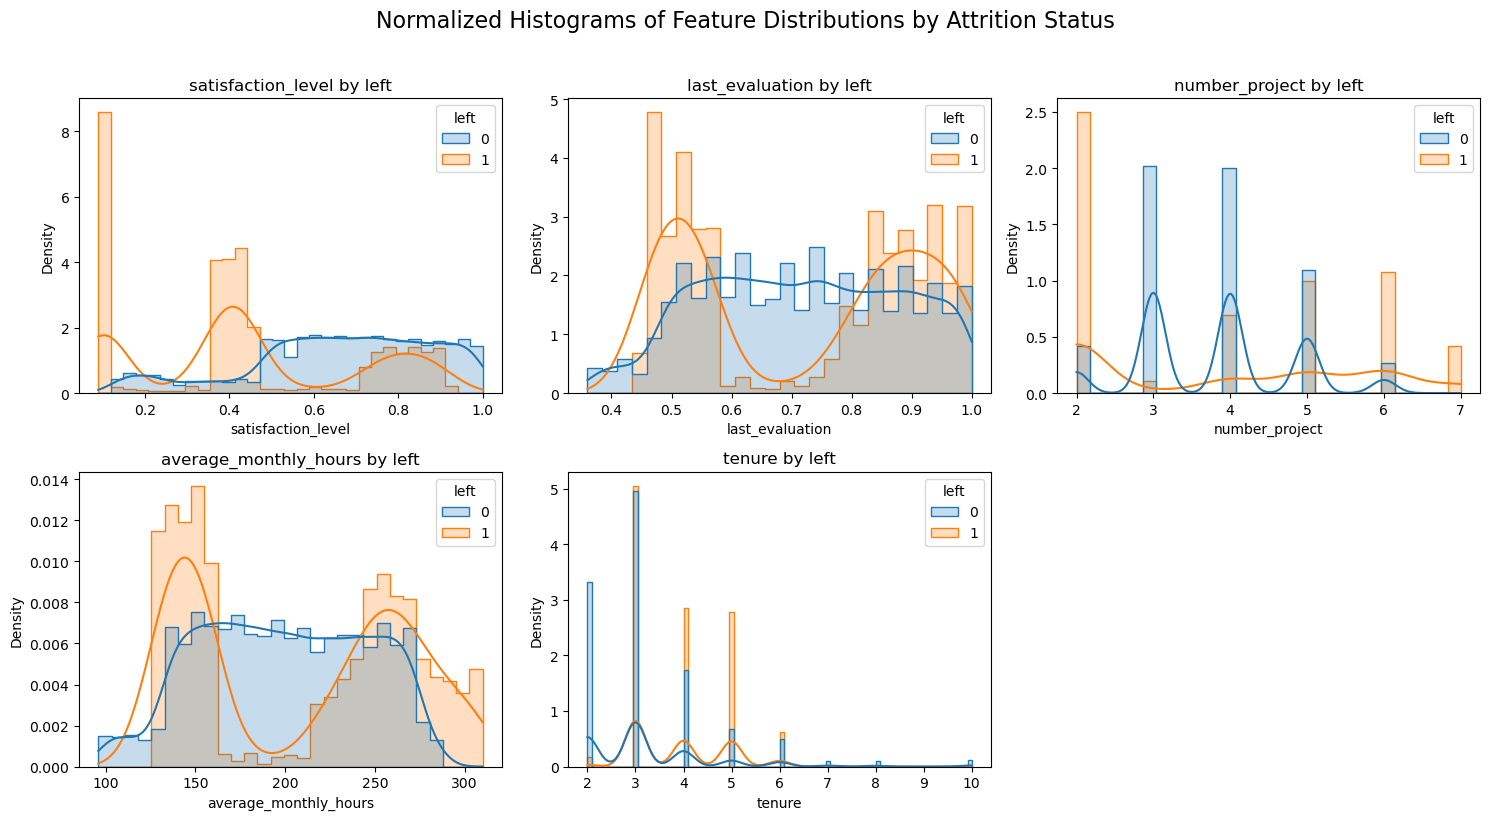

In [18]:
# Histograms to visualize distributions of numerical features
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(
        data=df,
        x=col,
        hue="left",
        kde=True,
        element="step",
        stat="density",
        common_norm=False,
    )
    plt.title(f"{col} by left")
plt.suptitle("Normalized Histograms of Feature Distributions by Attrition Status", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Raw counts:

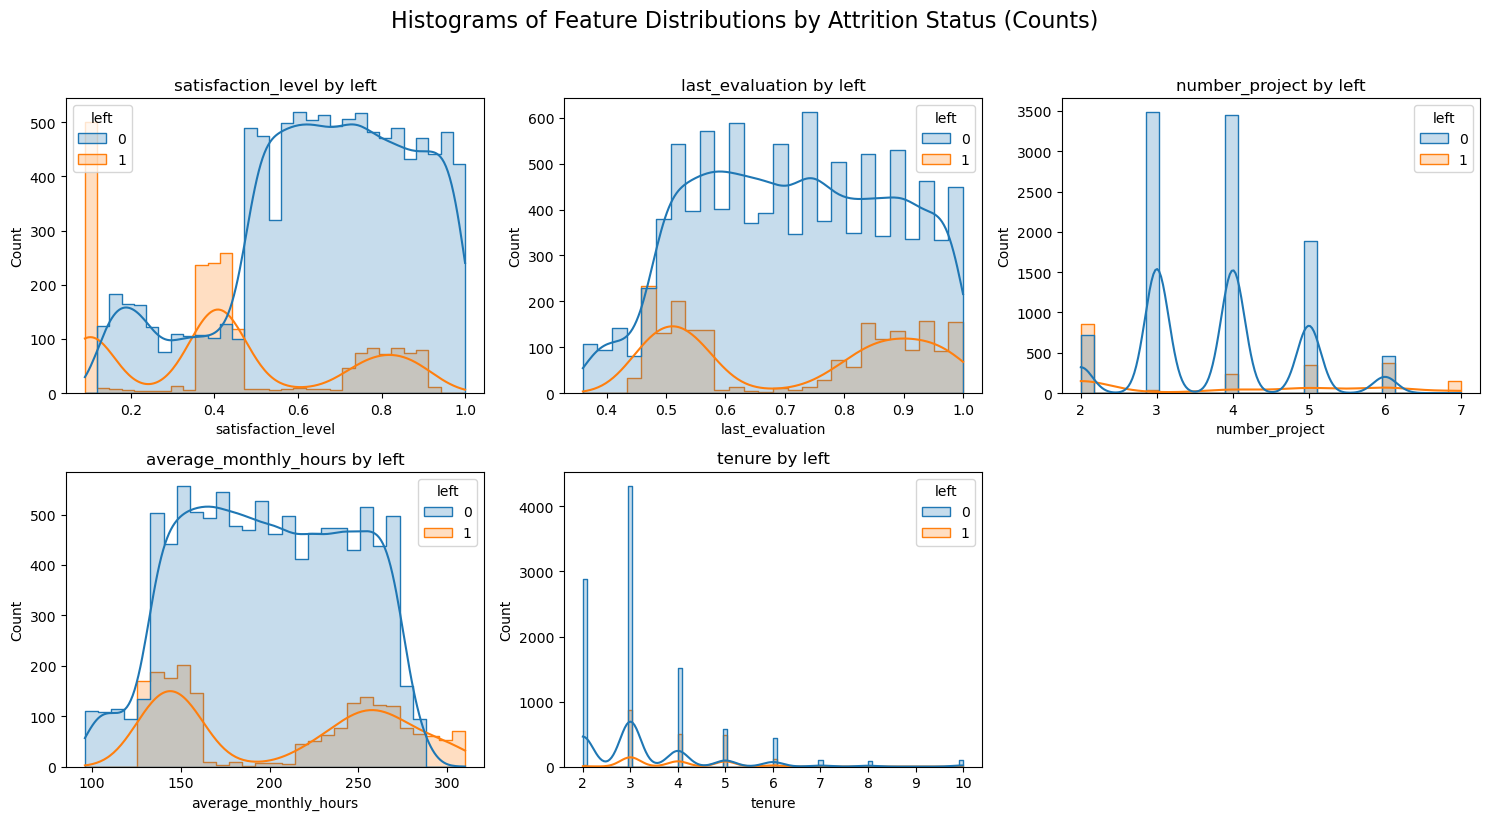

In [19]:
# Histograms to visualize distributions of numerical features (showing true count)
numerical_cols = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_monthly_hours",
    "tenure",
]

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, hue="left", kde=True, element="step", stat="count")
    plt.title(f"{col} by left")
plt.suptitle("Histograms of Feature Distributions by Attrition Status (Counts)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<a id="scatter-plots"></a>

## &#8227; Satisfaction Levels

[Back to top](#)

#### These visualizations dramatically illustrate the two main clusters of employees who left.

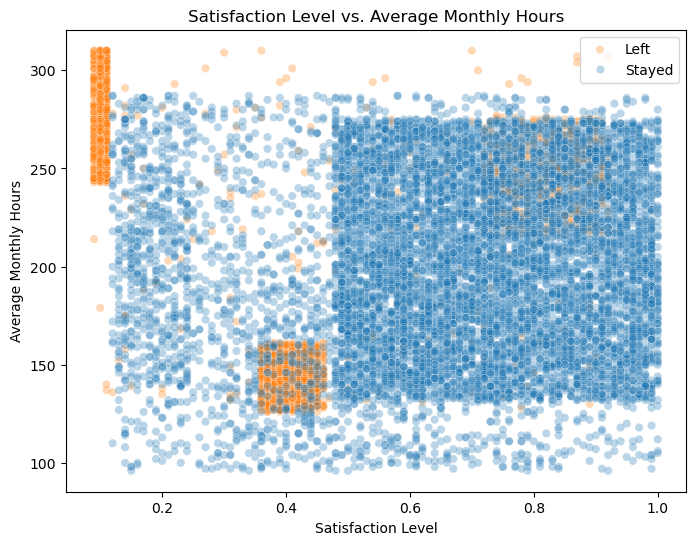

In [20]:
# Plot satisfaction vs. hours worked, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction Level vs. Average Monthly Hours")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

There are two prominent clusters among employees who left: one group with very low satisfaction who worked long hours, and another group who worked fewer than 40 hours per week and reported moderate dissatisfaction.

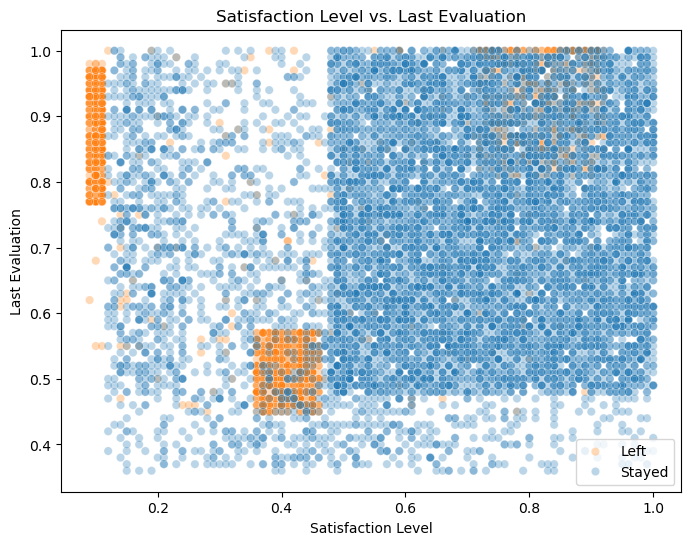

In [21]:
# Plot satisfaction level vs last evaluation, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="last_evaluation",
    hue="left",
    alpha=0.3,
)
plt.title("Satisfaction Level vs. Last Evaluation")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(loc="lower right", labels=["Left", "Stayed"])
plt.show()

The pattern is similar among employees who left: those with very low satisfaction often received high evaluations, while those with moderate dissatisfaction tended to have realtively low evaluation scores.

In [22]:
# Get mean and median satisfaction level for those who left vs. stayed
mean_satisfaction = df.groupby("left")["satisfaction_level"].mean()
median_satisfaction = df.groupby("left")["satisfaction_level"].median()

satisfaction_summary = pd.DataFrame(
    {"Mean": mean_satisfaction, "Median": median_satisfaction}
)

satisfaction_summary.index = satisfaction_summary.index.map({0: "Stayed", 1: "Left"})
satisfaction_summary

Mean  Median
left                    
Stayed  0.667365    0.69
Left    0.440271    0.41

Employees who left were, on average, 22.7% less satisfied (mean) and 28% less satisfied (median) than those who stayed.

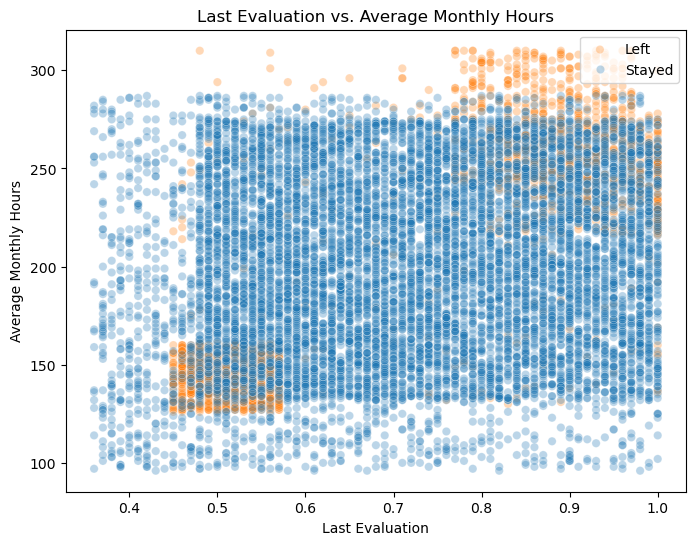

In [23]:
# Plot last evaluation vs. average monthly hours, colored by left
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="last_evaluation",
    y="average_monthly_hours",
    hue="left",
    alpha=0.3,
)
plt.title("Last Evaluation vs. Average Monthly Hours")
plt.xlabel("Last Evaluation")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="upper right", labels=["Left", "Stayed"])
plt.show()

<a id="tenure"></a>

## &#8227; Tenure

[Back to top](#)

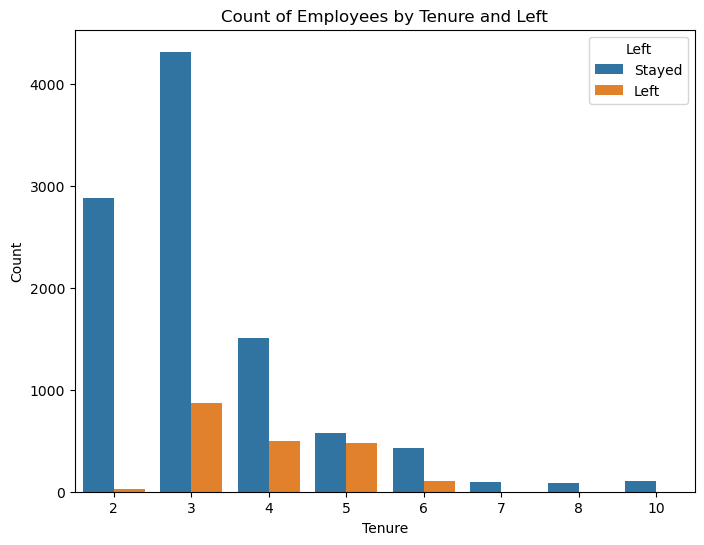

In [24]:
# Bar plot of tenure by left
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="tenure", hue="left")
plt.title("Count of Employees by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

Employees especially quit at the 4 and 5 year mark. Almost nobody quits after 5 years.

In [25]:
# Get total and percentage of employees by tenure and left
tenure_counts = df.groupby(["tenure", "left"]).size().unstack(fill_value=0)
tenure_percent = tenure_counts.div(tenure_counts.sum(axis=1), axis=0) * 100
tenure_summary = pd.DataFrame(
    {"Count": tenure_counts.stack(), "Percent": tenure_percent.stack()}
).reset_index()
tenure_summary.columns = ["Tenure", "Left", "Count", "Percent"]
tenure_summary["Left"] = tenure_summary["Left"].map({0: "Stayed", 1: "Left"})
tenure_summary

Tenure    Left  Count     Percent
0        2  Stayed   2879   98.934708
1        2    Left     31    1.065292
2        3  Stayed   4316   83.159923
3        3    Left    874   16.840077
4        4  Stayed   1510   75.311721
5        4    Left    495   24.688279
6        5  Stayed    580   54.613936
7        5    Left    482   45.386064
8        6  Stayed    433   79.889299
9        6    Left    109   20.110701
10       7  Stayed     94  100.000000
11       7    Left      0    0.000000
12       8  Stayed     81  100.000000
13       8    Left      0    0.000000
14      10  Stayed    107  100.000000
15      10    Left      0    0.000000

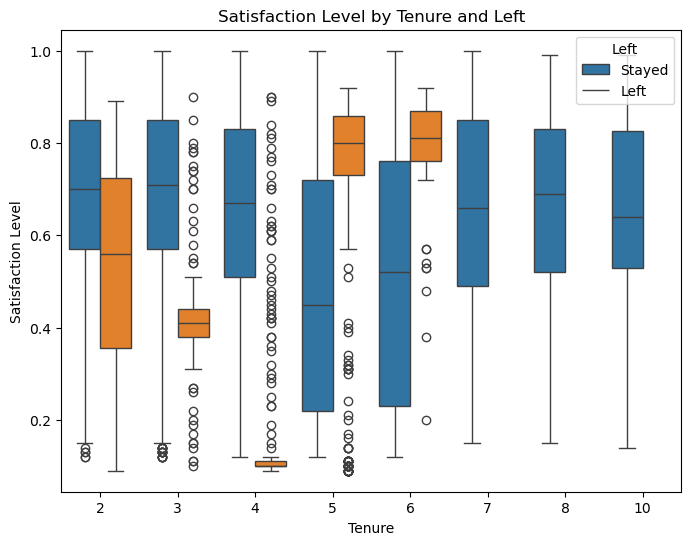

In [26]:
# Box plot of tenure vs satisfaction level, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="satisfaction_level", hue="left")
plt.title("Satisfaction Level by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Satisfaction Level")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

A band of employees with low satisfaction is especially evident at four years of tenure.

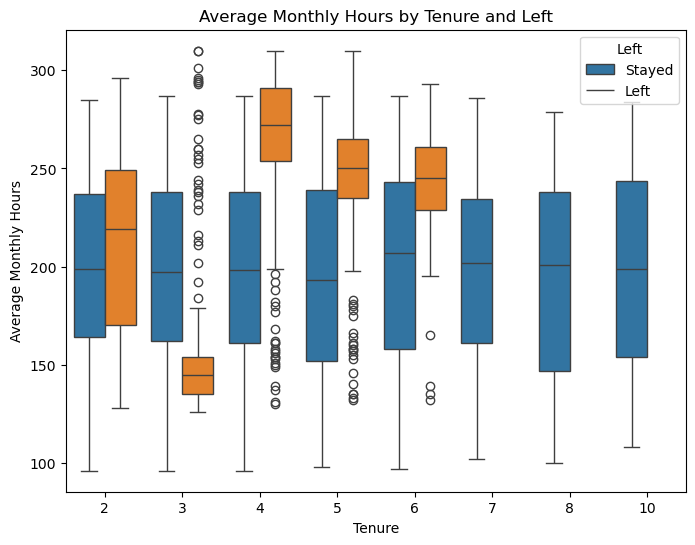

In [27]:
# Boxplot of tenure vs average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="tenure", y="average_monthly_hours", hue="left")
plt.title("Average Monthly Hours by Tenure and Left")
plt.xlabel("Tenure")
plt.ylabel("Average Monthly Hours")
plt.legend(title="Left", loc="upper right", labels=["Stayed", "Left"])
plt.show()

There is a clear grouping of leavers who consistently worked long hours (i.e., many in excess of a 60-hour work week). In fact, most employees at this company work above a standard 40-hour work week.

<a id="number-of-projects"></a>

## &#8227; Number of Projects

[Back to top](#)

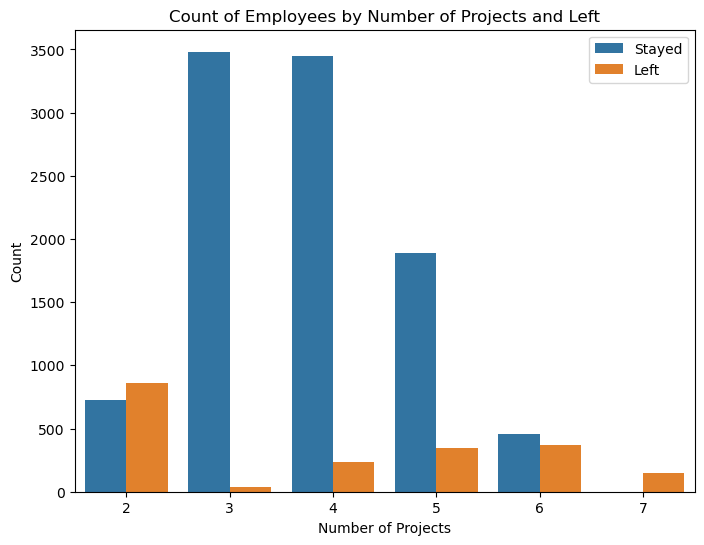

In [28]:
# Bar plot of number of projects vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="left",
)
plt.title("Count of Employees by Number of Projects and Left")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

In [29]:
# Count and percentage for number_project and left (number_project first)
cross_counts = df.groupby(["number_project", "left"]).size().unstack(fill_value=0)
cross_percent = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

summary = (
    cross_counts.astype(int)
    .join(cross_percent.round(2), lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="number_project", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
summary[["left", "Item"]] = summary["Status"].str.extract(r"(\d)_(count|percent)")
summary["left"] = summary["left"].map({"0": "Stayed", "1": "Left"})

# Pivot for easier viewing
summary = (
    summary.pivot_table(
        index=["number_project", "left"], columns="Item", values="Value"
    )
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

summary

Item  number_project    left   Count  Percent
0                  2    Left   857.0    54.17
1                  2  Stayed   725.0    45.83
2                  3    Left    38.0     1.08
3                  3  Stayed  3482.0    98.92
4                  4    Left   237.0     6.43
5                  4  Stayed  3448.0    93.57
6                  5    Left   343.0    15.36
7                  5  Stayed  1890.0    84.64
8                  6    Left   371.0    44.92
9                  6  Stayed   455.0    55.08
10                 7    Left   145.0   100.00
11                 7  Stayed     0.0     0.00

The number of projects is a strong predictor of attrition. Employees at both the low and high extremes are more likely to leave, and notably, all employees with 7 projects left the company.

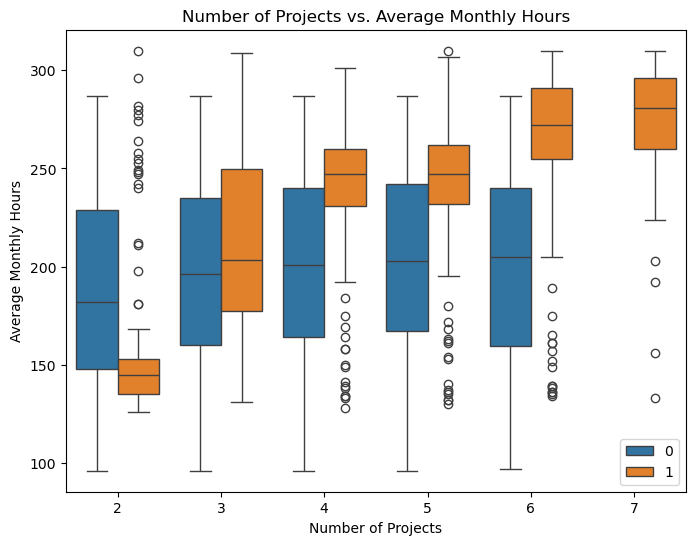

In [30]:
# Boxplot of number of projects vs. average monthly hours, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="average_monthly_hours",
    hue="left",
)
plt.title("Number of Projects vs. Average Monthly Hours")
plt.xlabel("Number of Projects")
plt.ylabel("Average Monthly Hours")
plt.legend(loc="lower right")
plt.show()

There are no notable outliers among employees who stayed. Among those who left, both overworked and underworked patterns are evident, as well as a group who left for more typical reasons. Interestingly, a few employees with 7 projects reported unusually low monthly hours, which may indicate data anomalies or unique circumstances.

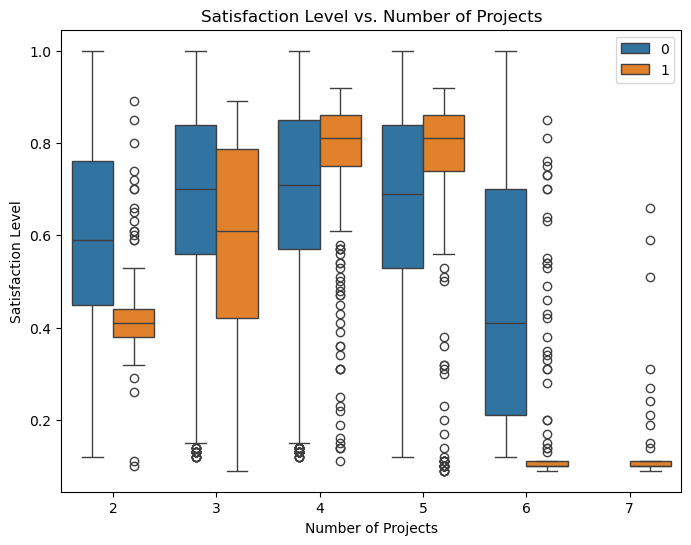

In [31]:
# Boxplot of satisfaction level vs number of projects, split by left
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="number_project",
    y="satisfaction_level",
    hue="left",
)
plt.title("Satisfaction Level vs. Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Satisfaction Level")
plt.legend(loc="upper right")
plt.show()

Among employees who left, dissatisfaction is most evident for those assigned a very high number of projects. Conversely, those with fewer projects also show signs of lower satisfaction, possibly indicating disengagement.


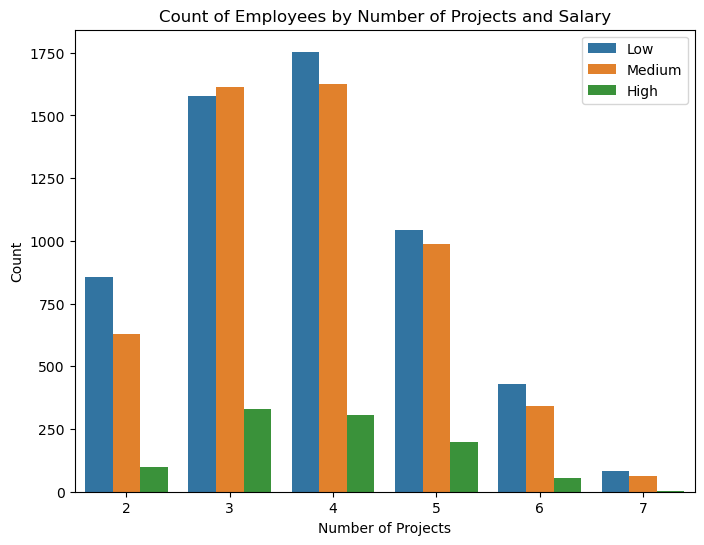

In [32]:
# Bar plot of number of projects vs salary
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="number_project",
    hue="salary",
)
plt.title("Count of Employees by Number of Projects and Salary")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Low", "Medium", "High"])
plt.show()

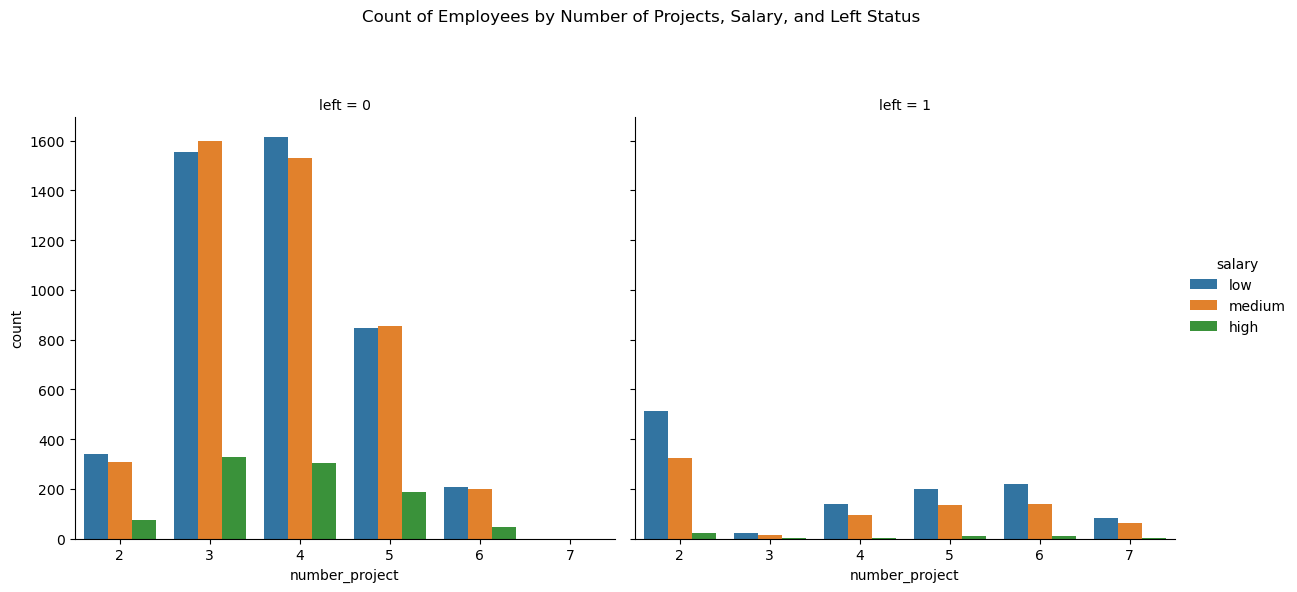

In [33]:
# Bar plot of number of projects vs salary, separated by left
sns.catplot(
    data=df,
    x="number_project",
    hue="salary",
    col="left",
    kind="count",
    height=6,
    aspect=1,
)
plt.subplots_adjust(top=0.8)
plt.suptitle("Count of Employees by Number of Projects, Salary, and Left Status")
plt.show()

There are no clear patterns linking number of projects, salary, and attrition. However, the relatively small group of high-salaried employees tends to fall in the middle range for number of projects.

<a id="salary"></a>

## &#8227; Salary & Promotions

[Back to top](#)

Salary does not show a discernible relationship with attrition; the 'high' salary group is much smaller than the others by an order of magnitude, limiting its impact on overall trends.

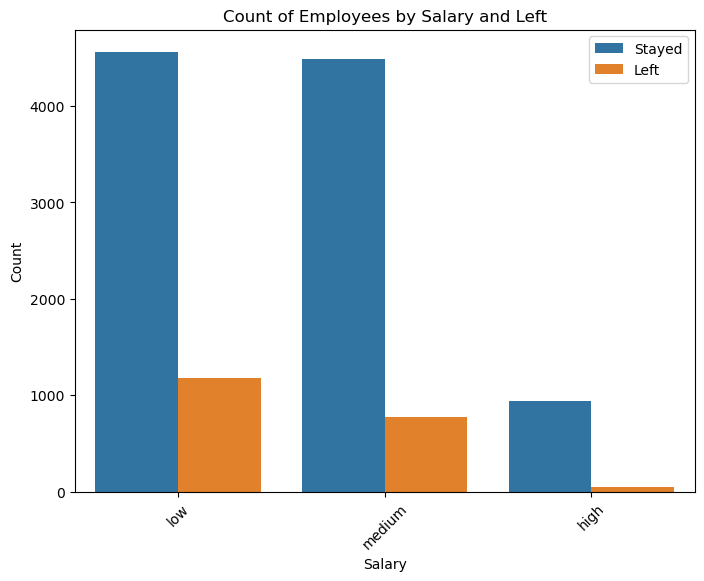

In [34]:
# Bar plot of salary vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="salary",
    hue="left",
)
plt.title("Count of Employees by Salary and Left")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [35]:
# Get total and percentage of employees by salary and left
salary_counts = df.groupby(["salary", "left"]).size().unstack(fill_value=0)
salary_percent = salary_counts.div(salary_counts.sum(axis=1), axis=0) * 100

salary_summary = (
    salary_counts.join(salary_percent, lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="salary", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
salary_summary[["Left", "Item"]] = salary_summary["Status"].str.extract(
    r"(\d)_(count|percent)"
)
salary_summary["Left"] = salary_summary["Left"].map({"0": "Stayed", "1": "Left"})

# Pivot so each row is salary + Left, with Count and Percent columns
salary_summary = (
    salary_summary.pivot_table(index=["salary", "Left"], columns="Item", values="Value")
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)
salary_summary["Percent"] = salary_summary["Percent"].round(2)
salary_summary

Item  salary    Left   Count  Percent
0       high    Left    48.0     4.85
1       high  Stayed   942.0    95.15
2        low    Left  1174.0    20.45
3        low  Stayed  4566.0    79.55
4     medium    Left   769.0    14.62
5     medium  Stayed  4492.0    85.38

#### Promotions

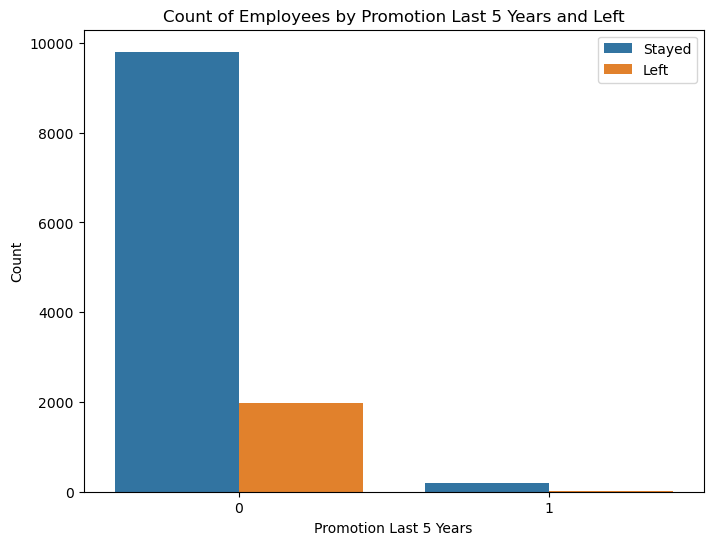

In [36]:
# Bar plot of promotion last 5 years vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="promotion_last_5years",
    hue="left",
)
plt.title("Count of Employees by Promotion Last 5 Years and Left")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

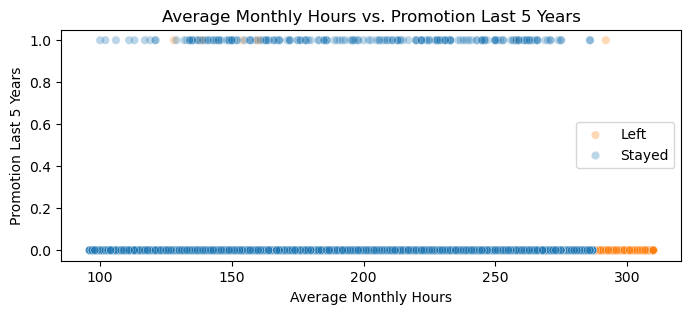

In [37]:
# Scatter plot average monthly hours vs. promotion last 5 years, colored by left
plt.figure(figsize=(8, 3))
sns.scatterplot(
    data=df,
    x="average_monthly_hours",
    y="promotion_last_5years",
    hue="left",
    alpha=0.3,
)
plt.title("Average Monthly Hours vs. Promotion Last 5 Years")
plt.xlabel("Average Monthly Hours")
plt.ylabel("Promotion Last 5 Years")
plt.legend(loc="center right", labels=["Left", "Stayed"])
plt.show()

Promotions were rare and, notably, all of the employees highest workload left.

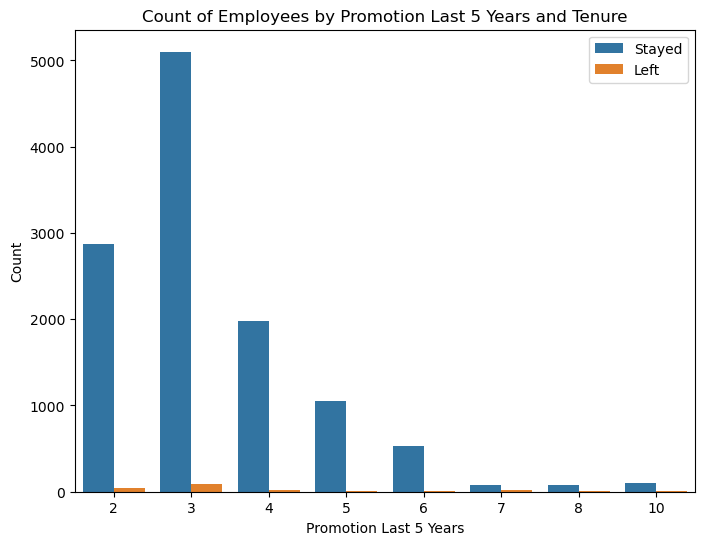

In [38]:
# Bar plot of promotion last 5 years and tenure
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="tenure",
    hue="promotion_last_5years",
)
plt.title("Count of Employees by Promotion Last 5 Years and Tenure")
plt.xlabel("Promotion Last 5 Years")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

<a id="work-accident"></a>

## &#8227; Work Accident

[Back to top](#)

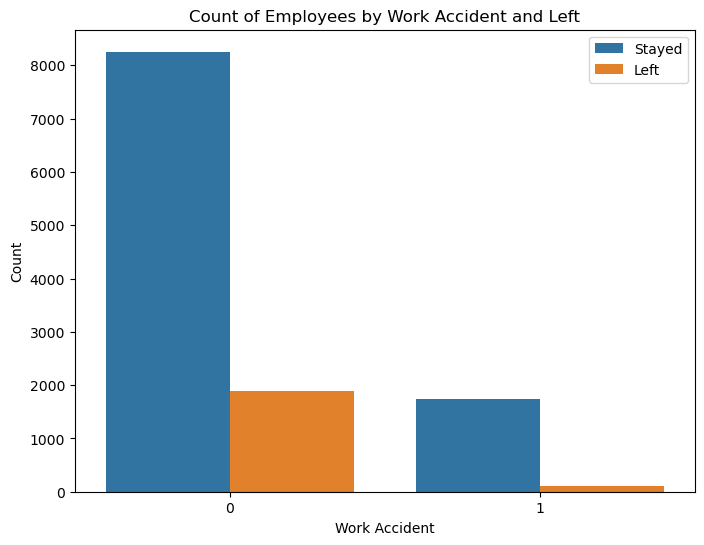

In [39]:
# Bar plot of work accident vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="work_accident",
    hue="left",
)
plt.title("Count of Employees by Work Accident and Left")
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.show()

In [40]:
# Count and percentage for work_accident and left (work_accident first)
cross_counts = df.groupby(["work_accident", "left"]).size().unstack(fill_value=0)
cross_percent = cross_counts.div(cross_counts.sum(axis=1), axis=0) * 100

summary = (
    cross_counts.astype(int)
    .join(cross_percent.round(2), lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="work_accident", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
summary[["left", "Item"]] = summary["Status"].str.extract(r"(\d)_(count|percent)")
summary["left"] = summary["left"].map({"0": "Stayed", "1": "Left"})
summary["work_accident"] = summary["work_accident"].map({0: "No", 1: "Yes"})

# Pivot for easier viewing
summary = (
    summary.pivot_table(index=["work_accident", "left"], columns="Item", values="Value")
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

summary

Item work_accident    left   Count  Percent
0               No    Left  1886.0    18.60
1               No  Stayed  8255.0    81.40
2              Yes    Left   105.0     5.68
3              Yes  Stayed  1745.0    94.32

Somewhat unexpectedly, having a work accident is associated with a lower likelihood of leaving. This could suggest that employees who experience an accident may receive increased support or attention from HR or the company, which encourages them to stay. However, this association could also be coincidental.

<a id="department"></a>

## &#8227; Department

[Back to top](#)

Department-level attrition closely matches the overall stay/leave split (83%/17%), suggesting department itself is not a major factor. More granular data (e.g., by manager or team) might uncover specific problem areas, but nothing stands out in the current breakdown.

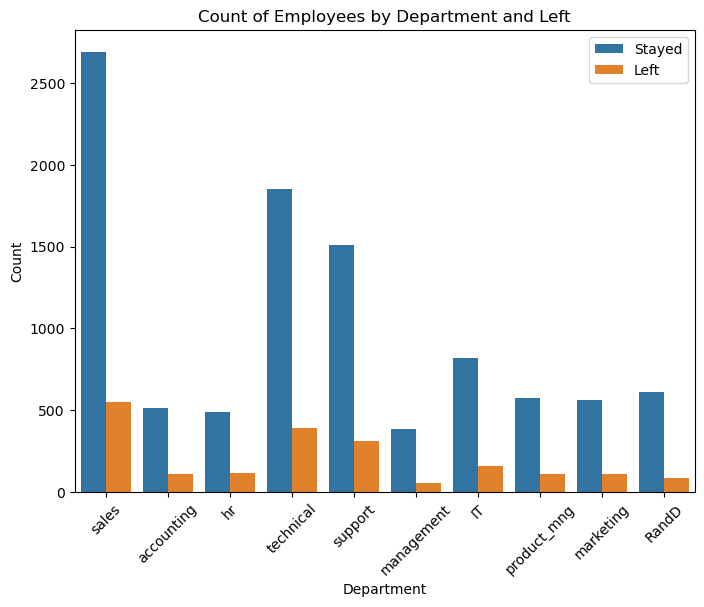

In [41]:
# Bar plot of department vs. left
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x="department",
    hue="left",
)
plt.title("Count of Employees by Department and Left")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(loc="upper right", labels=["Stayed", "Left"])
plt.xticks(rotation=45)
plt.show()

In [42]:
# Get total and percentage of employees by department and left
dept_counts = df.groupby(["department", "left"]).size().unstack(fill_value=0)

# Calculate percentages within each department (row-wise)
dept_percent = dept_counts.div(dept_counts.sum(axis=1), axis=0) * 100

# Reshape for easier viewing: melt to long format
dept_summary = (
    dept_counts.join(dept_percent, lsuffix="_count", rsuffix="_percent")
    .reset_index()
    .melt(id_vars="department", value_name="Value", var_name="Status")
)

# Split Status into Left and Item
dept_summary[["Left", "Item"]] = dept_summary["Status"].str.extract(
    r"(\d)_(count|percent)"
)
dept_summary["Left"] = dept_summary["Left"].map({"0": "Stayed", "1": "Left"})

# Pivot so each row is department + Left, with Count and Percent columns
dept_summary = (
    dept_summary.pivot_table(
        index=["department", "Left"], columns="Item", values="Value"
    )
    .reset_index()
    .rename(columns={"count": "Count", "percent": "Percent"})
)

# Round Percent
dept_summary["Percent"] = dept_summary["Percent"].round(2)

dept_summary

Item   department    Left   Count  Percent
0              IT    Left   158.0    16.19
1              IT  Stayed   818.0    83.81
2           RandD    Left    85.0    12.25
3           RandD  Stayed   609.0    87.75
4      accounting    Left   109.0    17.55
5      accounting  Stayed   512.0    82.45
6              hr    Left   113.0    18.80
7              hr  Stayed   488.0    81.20
8      management    Left    52.0    11.93
9      management  Stayed   384.0    88.07
10      marketing    Left   112.0    16.64
11      marketing  Stayed   561.0    83.36
12    product_mng    Left   110.0    16.03
13    product_mng  Stayed   576.0    83.97
14          sales    Left   550.0    16.98
15          sales  Stayed  2689.0    83.02
16        support    Left   312.0    17.13
17        support  Stayed  1509.0    82.87
18      technical    Left   390.0    17.38
19      technical  Stayed  1854.0    82.62

<a id="correlation-matrix"></a>

## &#8227; Correlation Matrix

[Back to top](#)

The correlation matrix shows no strong multicollinearity among the features, meaning the variables are not highly redundant. Employee attrition (leaving) is most strongly and negatively correlated with satisfaction level, indicating that less satisfied employees are more likely to leave. There are moderate positive correlations between leaving and variables such as average monthly hours, last evaluation, and number of projects, suggesting that higher values in these features are associated with a greater likelihood of attrition.

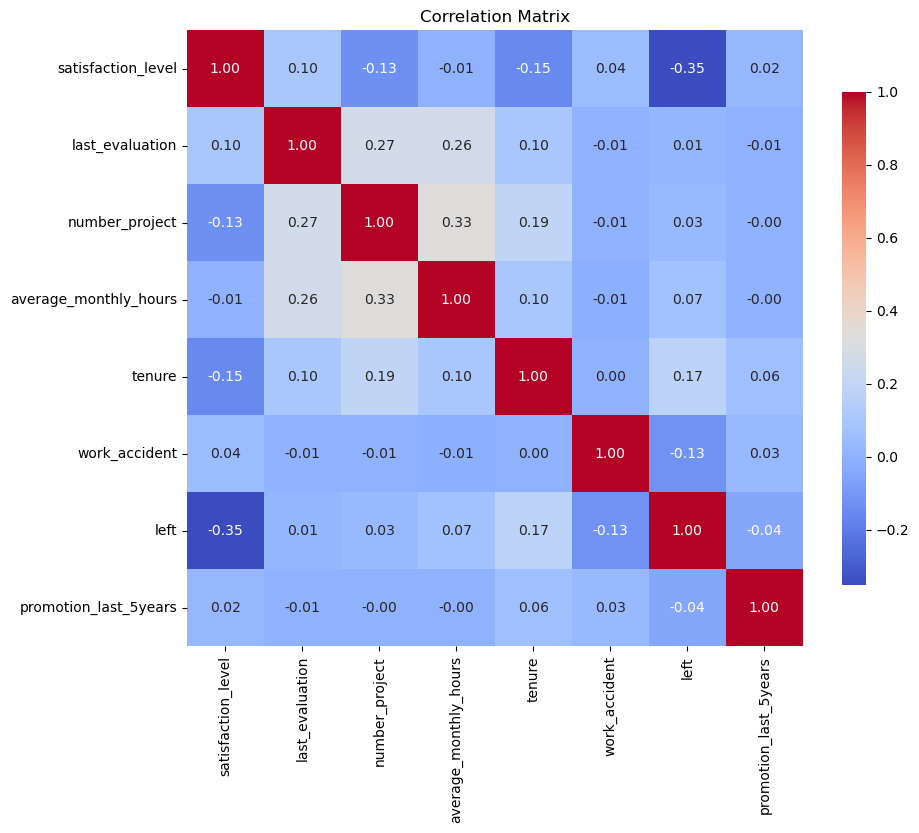

In [43]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.select_dtypes(include=[np.number]).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix")
plt.show()

<a id="insights"></a>

# Insights
---

[Back to Top](#)

The data suggests significant challenges with employee retention at this company. Two main groups of leavers emerge:

- **Underutilized and Dissatisfied:** Employees in this category worked on fewer projects and logged fewer hours than a typical full-time schedule, and reported lower satisfaction. These individuals may have been disengaged, assigned less work as they prepared to leave, or potentially subject to layoffs or terminations.
- **Overworked and Burned Out:** The second group managed a high number of projects (up to 7) and worked exceptionally long hours—sometimes nearing 80 hours per week. These employees exhibited very low satisfaction and rarely received promotions, suggesting that high demands without recognition or advancement led to burnout and resignation.

A majority of the workforce greatly exceeds the typical 40-hour work week (160–184 hours per month), pointing to a workplace culture that expects long hours. The combination of high workload and limited opportunities for advancement likely fuels dissatisfaction and increases the risk of turnover.

Performance evaluations show only a weak link to attrition; both those who left and those who stayed received similar review scores. This indicates that strong performance alone does not guarantee retention, especially if employees are overworked or lack opportunities for growth.

Other variables—such as department, salary, and work accidents—do not show strong predictive value for employee churn compared to satisfaction and workload. Overall, **the data points to issues with workload management** and limited career progression as the main factors driving employee turnover at this company.

<div class="button">
    <a href="models.html">On to Part 2<br>Model Construction</a>
</div>



<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/js/bootstrap.bundle.min.js"></script>
<script src="../static/js/scripts.js"></script>

